# Advanced Concepts
### Drawing gridlines on the frame

Using example code from <a href="https://stackoverflow.com/questions/20368413/draw-grid-lines-over-an-image-in-matplotlib">this</a> page.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as plticker
from skimage import io, data
from skimage.io import imread
from PIL import Image

# Open our image
image = Image.open('frame1.png')
img_dpi = 96

# Set up figure
fig = plt.figure(figsize=(float(image.size[0])/img_dpi, float(image.size[1])/img_dpi), dpi=img_dpi)
ax = fig.add_subplot(111)

In [2]:
# Remove whitespace from around the image
# Try running the script with and without this block to see the difference it makes
fig.subplots_adjust(left=0, right=1, bottom=0, top=1)

In [3]:
# Set the gridding interval (here, major is used)
img_Interval = 42
loc = plticker.MultipleLocator(base=img_Interval)
ax.xaxis.set_major_locator(loc)
ax.yaxis.set_major_locator(loc)

# Add the grid
ax.grid(which='major', axis='both', linestyle='-')

# Add the image
ax.imshow(image)

In [4]:
# To additionally label each cell with a number
# Find number of gridsquares in x and y direction
nx = abs(int(float(ax.get_xlim()[1]-ax.get_xlim()[0])/float(img_Interval)))
ny = abs(int(float(ax.get_ylim()[1]-ax.get_ylim()[0])/float(img_Interval)))

# Add labels
for i in range(ny):
    y = img_Interval / 2 + i * img_Interval
    for j in range(nx):
        x = img_Interval / 2. + float(j) * img_Interval
        ax.text(x, y, '{:d}'.format(i+j*nx), color='r', ha='center', va='center')

In [5]:
# Save file
fig.savefig('gridline_frame1.png', dpi=img_dpi)

Result:
[![gridline-frame1.png](https://i.postimg.cc/yxSvGBWn/gridline-frame1.png)](https://postimg.cc/FkNyfMyJ)

In the main code we'll now also prompt the user for the image's dpi until we find a way to automatically determine this from the image file itself. Let's also see if we can tweak the code to determine `img_Interval` based on our custom gridsize input. Users will input how many cells they want and we'll generate it off that. But if we're able to show a live preview, perhaps users could play around with a slider to generate a grid they're happy with.

Let's test some dpi-fetching code we found <a href="https://github.com/python-pillow/Pillow/issues/2912">here</a>.

In [6]:
if(image.info.get('dpi')):
    x_dpi, y_dpi = image.info['dpi']
    if(x_dpi != y_dpi):
        print("Inconsistent DPI image data")
    print("x_dpi: " + str(x_dpi))
    print("y_dpi: " + str(y_dpi))
else:
    print("No DPI data. Invalid image header.")
    print(image.info)

x_dpi: 96
y_dpi: 96


Okay, so it seems the code
`x_dpi, y_dpi = image.info['dpi']`
is where the magic is happening. We can then extract either of these to know the dpi of the image. Let's try it on a completely different image, one we didn't make in Paint.

In [7]:
secondImage = Image.open('yoked_ox.jpg')
if(secondImage.info.get('dpi')):
    x_dpi, y_dpi = secondImage.info['dpi']

print("x_dpi: " + str(x_dpi))
print("y_dpi: " + str(y_dpi))

x_dpi: 96
y_dpi: 96


It also seems that the preceding `if` statement is needed for the code to run. I don't know why but won't bother it.
Now we move on to figuring out determining `img_Interval` automatically.

We know that `img_Interval` for our example frames is ideally around 42. Our example images are 128x128 px, so it happens that 42 px is *around* a third of the image. This makes sense since the image is being cut into thirds both vertically and horizontally. This is because we want nine cells as an end product. In MIA's main script code, this code determines the size of each cell based on the input the user enters when asked how many cells they want:
<br />`cellSize = frameShape / np.sqrt(gridSize)`
<br />This code takes the `.shape` of the `frame` and divides it by the square root of the `gridSize`, which is the amount of cells the user entered. This would, in theory, assign to `cellSize` the size of a single cell. Let's test it here:

In [8]:
frame = imread('frame1.png', as_gray=True)
frameShape = frame.shape
cellSize = frameShape / np.sqrt(9)
print(cellSize)

[42.66666667 42.66666667]


Great! As we can see, the ideal size is around 42 px. Try tweaking the number fed into `np.sqrt()` and see if it adjusts to different cell sizes!

Alright, so let's try doing it all together now:

(491, 499)
[43.3986787  44.10578548]


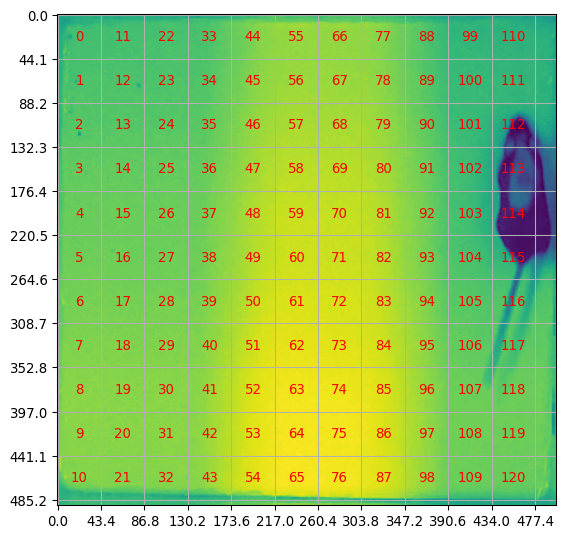

In [15]:
# Open our image
mouse = imread('mouse.PNG', as_gray=True)
mouseImg = Image.open('mouse.PNG')
if(mouseImg.info.get('dpi')):
    x_dpi, y_dpi = mouseImg.info['dpi']
img_dpi = (x_dpi + y_dpi) / 2

# Set up figure
fig = plt.figure(figsize=(float(mouseImg.size[0])/img_dpi, float(mouseImg.size[1])/img_dpi), dpi=img_dpi)
ax = fig.add_subplot(111)

# Remove whitespace from around the image
fig.subplots_adjust(left=0, right=1, bottom=0, top=1)

# Set the gridding interval
interval_frameShape = mouse.shape
print(interval_frameShape)
interval_cellSize = interval_frameShape / np.sqrt(128) # Change the number in np.sqrt() and see what happens!
print(interval_cellSize)
mouse_xInterval = interval_cellSize[0]
mouse_yInterval = interval_cellSize[1]
xloc = plticker.MultipleLocator(base=mouse_xInterval)
yloc = plticker.MultipleLocator(base=mouse_yInterval)
ax.xaxis.set_major_locator(xloc)
ax.yaxis.set_major_locator(yloc)

# Add the grid
ax.grid(which='major', axis='both', linestyle='-')

# Add the image
ax.imshow(mouse)

# To additionally label each cell with a number
# Find number of gridsquares in x and y direction
nx = abs(int(float(ax.get_xlim()[1]-ax.get_xlim()[0])/float(mouse_xInterval)))
ny = abs(int(float(ax.get_ylim()[1]-ax.get_ylim()[0])/float(mouse_yInterval)))

# Add labels
for i in range(ny):
    y = mouse_yInterval / 2 + i * mouse_yInterval
    for j in range(nx):
        x = mouse_xInterval / 2. + float(j) * mouse_xInterval
        ax.text(x, y, '{:d}'.format(i+j*nx), color='r', ha='center', va='center')
        
# Save file
fig.savefig('gridline_mouse.png', dpi=img_dpi)

Nice, that's exactly what we need! As you can see from the code above, I put 64 into `np.sqrt()` to see what we'd get. Our code does exactly what we want it to -- and it outputs the gridlined files, too. The `gridSize` is entered by the user in the main script.

### Segmenting the image

Next, let's play with thresholds to try and get that mouse to appear one color and the entire background as another. First, we're going to view the image as grayscale.

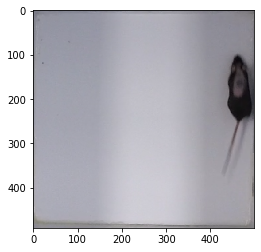

In [10]:
# Load and plot in grayscale
mouse_threshold = imread("mouse.png")
plt.imshow(mouse_threshold, cmap=plt.cm.Greys_r)

Now let's normalize the image by setting all pixel values form 0 to 1.

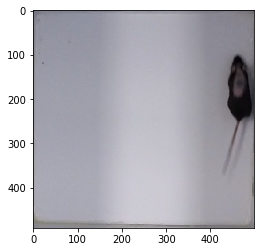

In [11]:
# Normalize pixel values from 0 to 1
mouse_threshold_norm = ((mouse_threshold - np.min(mouse_threshold)) / (np.max(mouse_threshold) - np.min(mouse_threshold)))
plt.imshow(mouse_threshold_norm, cmap=plt.cm.Greys_r)

And finally segment the image by applying a threshold to the normalized image. Try playing around with the `threshold` value to see how it drastically affects our output.

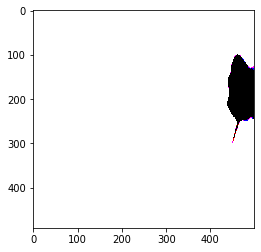

In [18]:
# Threshold the normalized image
threshold = 0.36
seg_mouse = mouse_threshold_norm > threshold
plt.imshow(seg_mouse.astype(float), cmap=plt.cm.Greys_r)

And just like that, there's our little mouse clear as day. Now all that's left is to crop the frame to include only the *key cells* and we can run it through our script's main loop (as shown in the example documentation notebook).

### Trimming the image

In our example notebook we cheated when trimming the image -- we did the maths for the ideal range of px to enter. Fortunately, we now know a formula for finding the size of each individual cell (stored in `cellSize`). We also now know how to move from cell to cell throughout the entire image (see **Drawing gridlines on the frame** above). Using our combined knowledge, we should be able to travel cell-by-cell through the image, checking if each is a *key cell*. The ideal method would be to locate the location of the *key cells* and then trim everything that *isn't* a *key cell* (the inverse of that location).

Here's the trimming process based off of the example notebook's code:

imageio.core.util.Array

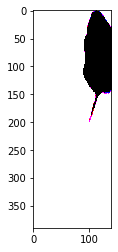

In [20]:
trimmed = seg_mouse[100:490, 350:490].astype(float)
plt.imshow(trimmed, cmap=plt.cm.Greys_r)

So using the code `[y0:y1, x0:x1]` after our segmented image will yield us with the trimmed image. Try to play around with the values to see how it will affect what's shown. Now all we have to do is find a way for the program to automatically determine what these numbers should be based on the selected *key cell(s)*.